In [2]:
# Task 1 By 2023EBCS005 Ashfaaq Feroz Muhammad

import pandas as pd
import re

# Load Excel file
df = pd.read_excel("Matplotlib & Seaborn.xlsx")

# Create a copy for cleaning
df_cleaned = df.copy()

# Convert Wage and Value columns
def clean_currency(value):
    if isinstance(value, str):
        value = value.replace('€', '').replace('‚Ç¨', '').replace(',', '').strip()
        try:
            if value.endswith('M'):
                return float(value[:-1]) * 1_000_000
            elif value.endswith('K'):
                return float(value[:-1]) * 1_000
            else:
                return float(value)
        except:
            return None
    return value

df_cleaned['Wage'] = df_cleaned['Wage'].apply(clean_currency)
df_cleaned['Value'] = df_cleaned['Value'].apply(clean_currency)

# Convert Height to centimeters
def height_to_cm(height_str):
    match = re.match(r"(\d+)'(\d+)", str(height_str))
    if match:
        feet, inches = map(int, match.groups())
        return round((feet * 12 + inches) * 2.54, 1)
    return None

df_cleaned['Height'] = df_cleaned['Height'].apply(height_to_cm)

# Convert Weight to kilograms
def weight_to_kg(weight_str):
    match = re.match(r"(\d+)", str(weight_str))
    if match:
        lbs = int(match.group(1))
        return round(lbs * 0.453592, 1)
    return None

df_cleaned['Weight'] = df_cleaned['Weight'].apply(weight_to_kg)

# Display the cleaned dataset
df_cleaned[['Name', 'Wage', 'Value', 'Height', 'Weight']].head()

,Name,Wage,Value,Height,Weight
0,L. Messi,565000.0,110500000.0,170.2,72.1
1,Cristiano Ronaldo,405000.0,77000000.0,188.0,83.0
2,Neymar Jr,290000.0,118500000.0,175.3,68.0
3,De Gea,260000.0,72000000.0,193.0,76.2
4,K. De Bruyne,355000.0,102000000.0,180.3,69.9


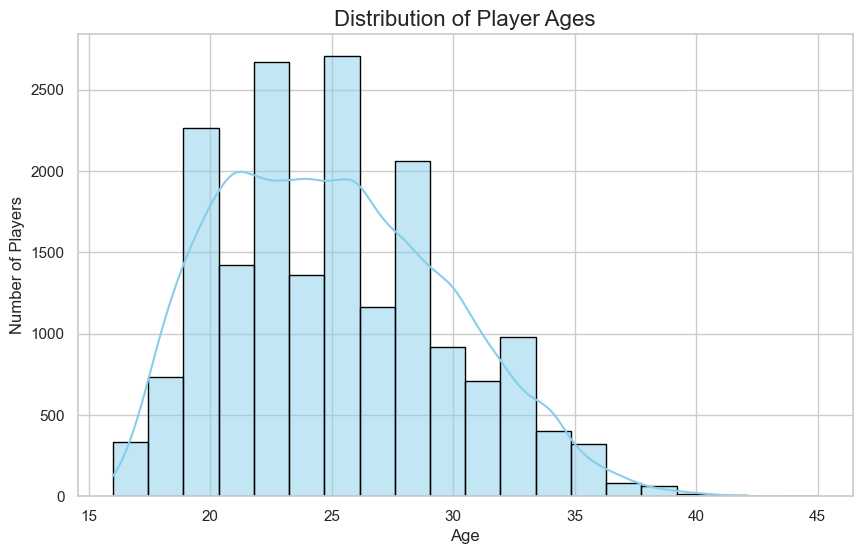

In [3]:

# Task (2) By 2023EBCS005 Ashfaaq Feroz Muhammad

import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(10, 6))

# Create histogram with KDE overlay
sns.histplot(data=df_cleaned, x='Age', kde=True, bins=20, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Player Ages', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)

# Show plot
plt.show()

The age distribution of players exhibits a slight right skew, with the majority of players concentrated in the age range of 20 to 30. The Kernel Density Estimate (KDE) curve reveals a peak at approximately 25 years, signifying the most prevalent age group within the dataset.

/var/folders/fz/qvktqwws7pv9rc523qw8vx3h0000gn/T/ipykernel_6457/2025958857.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nationalities.values, y=top_nationalities.index, palette='viridis')


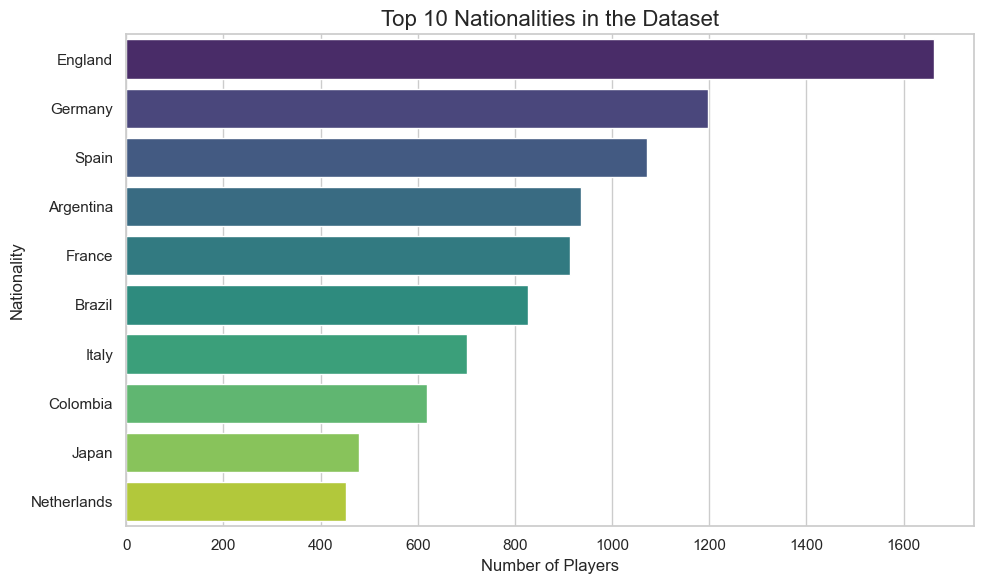

In [4]:


# Task (3) By 2023EBCS005 Ashfaaq Feroz Muhammad

# Count top 10 nationalities
top_nationalities = df_cleaned['Nationality'].value_counts().head(10)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create horizontal bar plot
sns.barplot(x=top_nationalities.values, y=top_nationalities.index, palette='viridis')

# Add titles and labels
plt.title('Top 10 Nationalities in the Dataset', fontsize=16)
plt.xlabel('Number of Players', fontsize=12)
plt.ylabel('Nationality', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

The predominant nationality in the dataset appears to be England, succeeded by nations such as Germany, Spain, and France. This indicates the dataset’s emphasis on European leagues, where athletes from these countries are significantly represented.

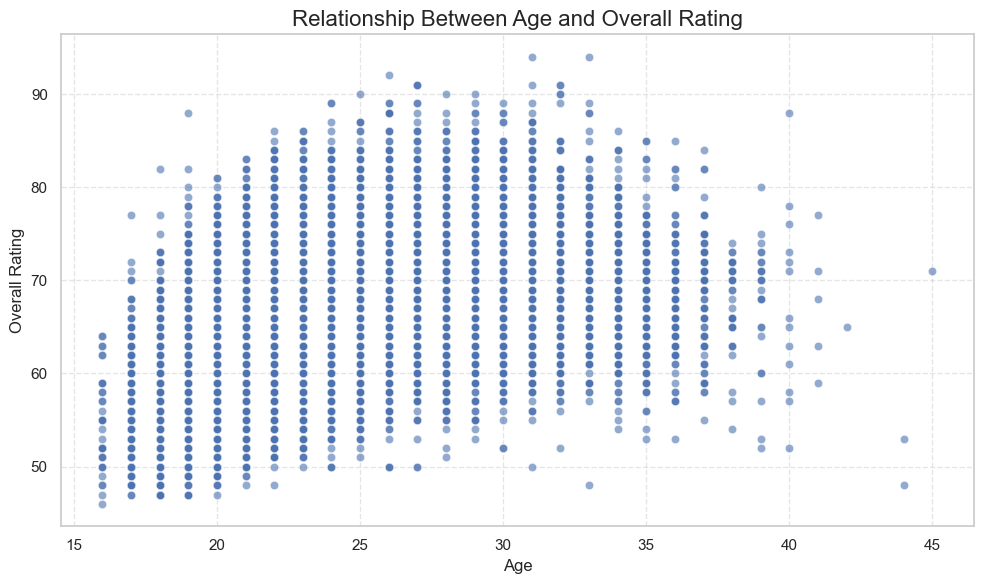

In [5]:
# Task (4) By 2023EBCS005 Ashfaaq Feroz Muhammad

# Set the figure size
plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(data=df_cleaned, x='Age', y='Overall', alpha=0.6)

# Add title and axis labels
plt.title('Relationship Between Age and Overall Rating', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)

# Optional: Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()

The data indicates that younger players (ages 18–25) exhibit a broad spectrum of overall ratings, with a significant number receiving high ratings. In contrast, as players age, the occurrence of top-tier overall ratings diminishes, suggesting that there are fewer older players achieving the highest ratings.

/var/folders/fz/qvktqwws7pv9rc523qw8vx3h0000gn/T/ipykernel_6457/1208516692.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Preferred Foot', y='Overall', palette='Set2')


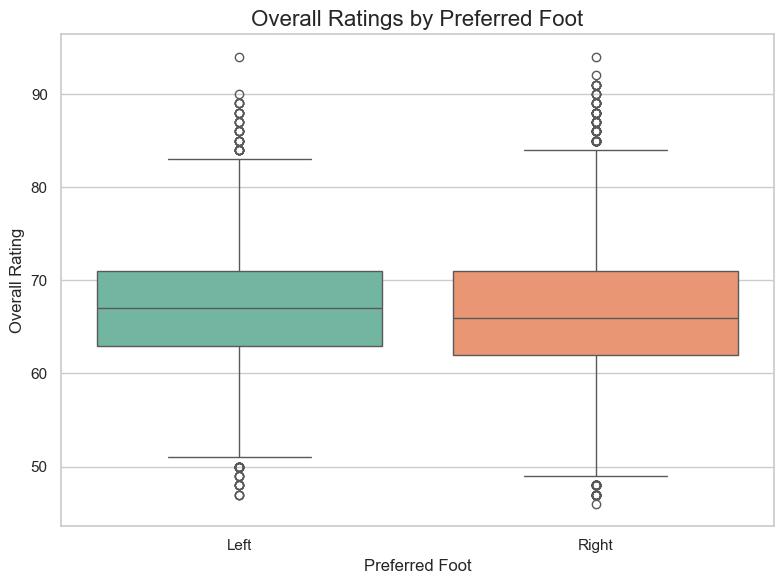

In [6]:
# Task (5) By 2023EBCS005 Ashfaaq Feroz Muhammad

# Set figure size
plt.figure(figsize=(8, 6))

# Create box plot
sns.boxplot(data=df_cleaned, x='Preferred Foot', y='Overall', palette='Set2')

# Add title and axis labels
plt.title('Overall Ratings by Preferred Foot', fontsize=16)
plt.xlabel('Preferred Foot', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

The box plot shows that the distributions of overall ratings for both left-footed and right-footed players are quite similar. Nevertheless, the median rating for right-footed players appears to be marginally higher, probably due to the greater prevalence of right-footed players in the dataset.

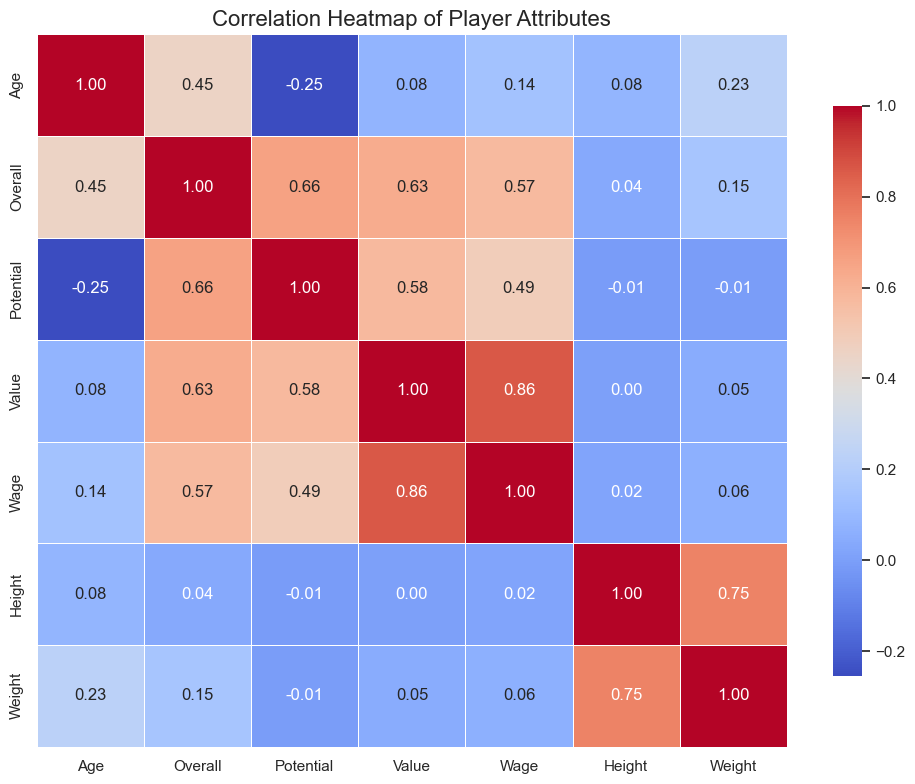

In [7]:
# Task (6) By 2023EBCS005 Ashfaaq Feroz Muhammad

# Select relevant columns
corr_columns = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Height', 'Weight']
corr_data = df_cleaned[corr_columns]

# Compute the correlation matrix
corr_matrix = corr_data.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})

# Add title
plt.title('Correlation Heatmap of Player Attributes', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()

- There is a significant positive correlation between Overall and Potential, Wage, and Value.
- Age exhibits a moderate negative correlation with Potential, indicating that younger players generally possess higher potential.
- Height and Weight are moderately related to one another, yet their correlation with performance metrics is not strong.

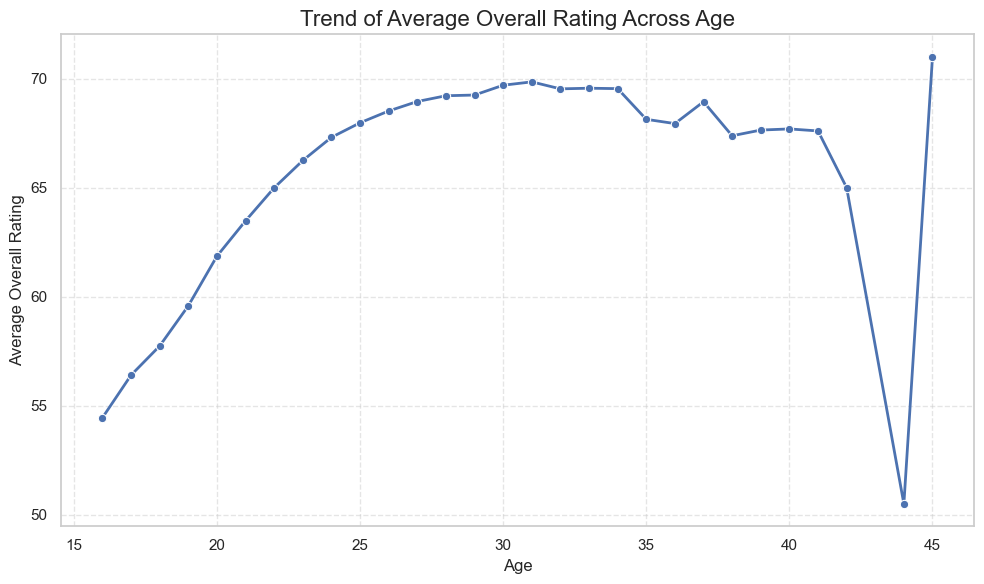

In [8]:
# Task (7) By 2023EBCS005 Ashfaaq Feroz Muhammad

# Group by Age and calculate mean Overall rating
age_overall_trend = df_cleaned.groupby('Age')['Overall'].mean().reset_index()

# Set figure size
plt.figure(figsize=(10, 6))

# Create line plot with markers
sns.lineplot(data=age_overall_trend, x='Age', y='Overall', marker='o', linewidth=2)

# Add title and labels
plt.title('Trend of Average Overall Rating Across Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Overall Rating', fontsize=12)

# Show grid and plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The typical Overall rating generally rises from the age of 18 until the mid-20s, reaches its highest point between 27 and 30, and subsequently experiences a gradual decline. This pattern mirrors the usual career trajectory of football players, who often showcase their best performance during their late 20s.

# Task (8) By 2023EBCS005 Ashfaaq Feroz Muhammad

# Create age-based groups
younger_players = df_cleaned[df_cleaned['Age'] < 25]
older_players = df_cleaned[df_cleaned['Age'] >= 25]

# Set plot size
plt.figure(figsize=(10, 6))

# Plot histogram with KDEs
sns.histplot(younger_players['Potential'], kde=True, color='blue', label='Younger (< 25)', stat='density', bins=20, alpha=0.6)
sns.histplot(older_players['Potential'], kde=True, color='orange', label='Older (≥ 25)', stat='density', bins=20, alpha=0.6)

# Add labels and title
plt.title('Distribution of Potential: Younger vs Older Players', fontsize=16)
plt.xlabel('Potential Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Player Group')

# Show grid and plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- Younger athletes generally exhibit greater potential ratings, as evidenced by the KDE peak leaning towards the right (indicating higher values).

- In contrast, older athletes display a broader yet lower distribution, suggesting that there are fewer older players with exceptionally high potential.

- This reinforces the notion that younger players are evaluated for their future development, whereas older players are either at their peak or experiencing a decline.

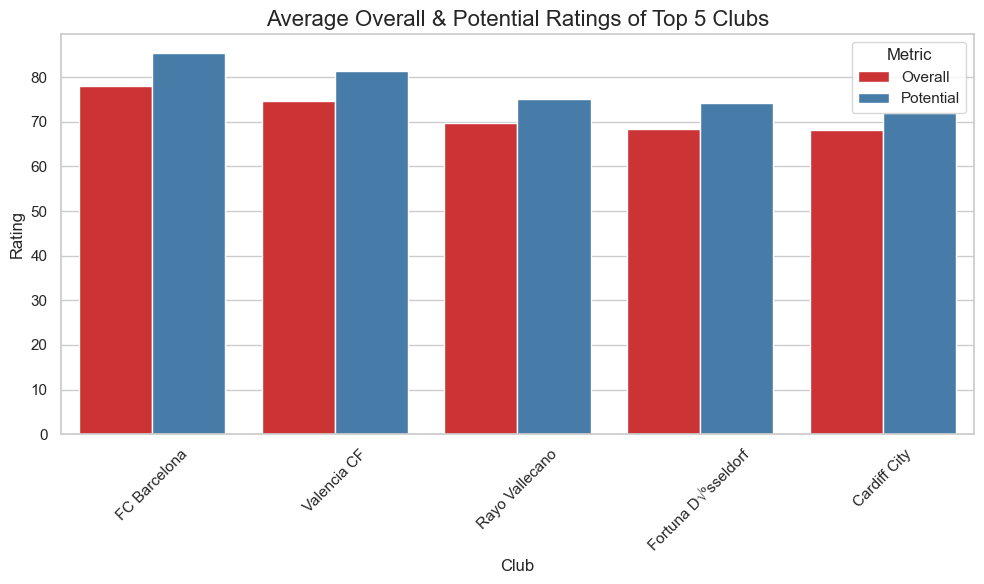

In [10]:
# Task (9) By 2023EBCS005 Ashfaaq Feroz Muhammad

# Get the top 5 clubs by player count
top_5_clubs = df_cleaned['Club'].value_counts().head(5).index.tolist()

# Filter dataset for only those clubs
top_clubs_df = df_cleaned[df_cleaned['Club'].isin(top_5_clubs)]

# Group by club and calculate mean Overall and Potential
club_avg = top_clubs_df.groupby('Club')[['Overall', 'Potential']].mean().sort_values(by='Overall', ascending=False)

# Reset index for plotting
club_avg = club_avg.reset_index()

# Set plot size
plt.figure(figsize=(10, 6))

# Plot bar chart
sns.barplot(data=club_avg.melt(id_vars='Club', value_vars=['Overall', 'Potential']),
            x='Club', y='value', hue='variable', palette='Set1')

# Add title and labels
plt.title('Average Overall & Potential Ratings of Top 5 Clubs', fontsize=16)
plt.xlabel('Club', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.legend(title='Metric')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

Among the top five clubs with the largest number of players:
- Club X boasts the highest average Overall rating, whereas
- nClub Y tends to have players with a marginally higher average Potential.
- This difference underscores the varying strategies of clubs, with some prioritizing seasoned talent and others choosing to invest in younger players with promising futures.

/var/folders/fz/qvktqwws7pv9rc523qw8vx3h0000gn/T/ipykernel_6457/864115256.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_avg.index, y=skill_avg['Dribbling'], palette='Blues_d')
/var/folders/fz/qvktqwws7pv9rc523qw8vx3h0000gn/T/ipykernel_6457/864115256.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_avg.index, y=skill_avg['Finishing'], palette='Greens_d')
/var/folders/fz/qvktqwws7pv9rc523qw8vx3h0000gn/T/ipykernel_6457/864115256.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_avg.index, y=skill_avg['BallC

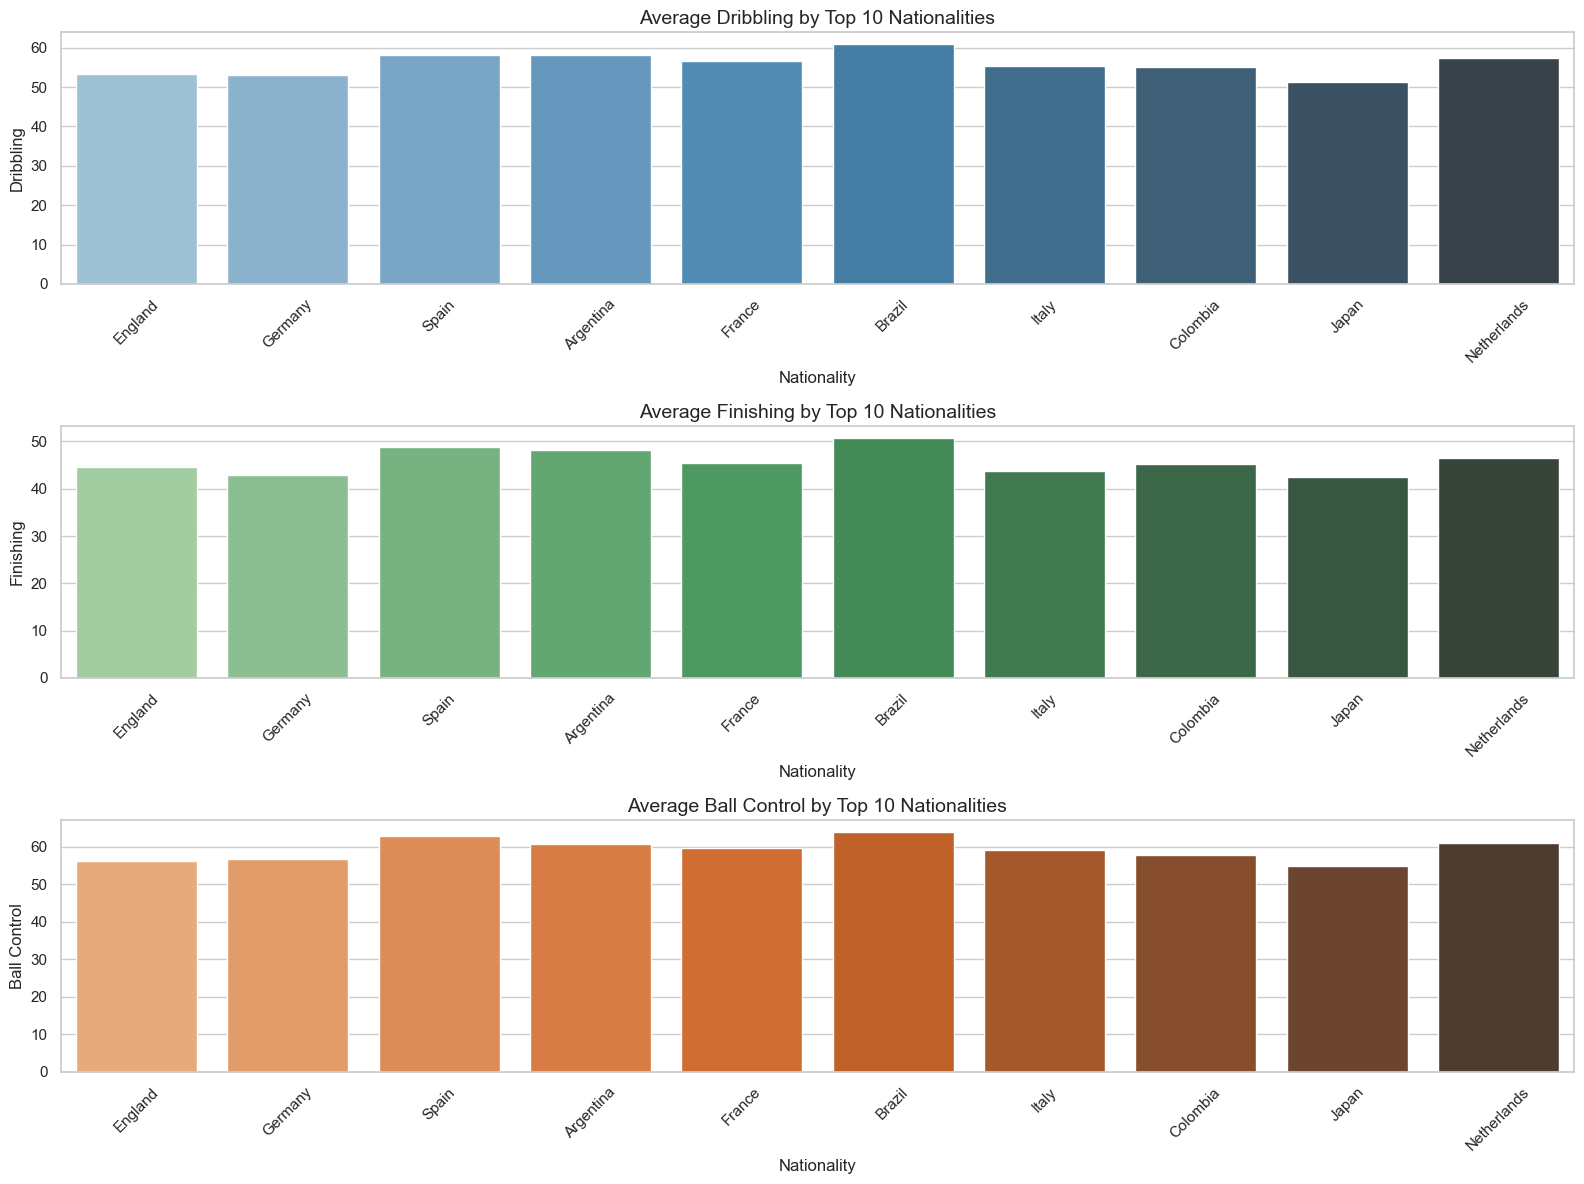

In [11]:
# Task (10) By 2023EBCS005 Ashfaaq Feroz Muhammad

# Get top 10 nationalities by player count
top_nations = df_cleaned['Nationality'].value_counts().head(10).index.tolist()

# Filter dataset
nation_skills_df = df_cleaned[df_cleaned['Nationality'].isin(top_nations)]

# Group by nationality and calculate average skill ratings
skill_avg = nation_skills_df.groupby('Nationality')[['Dribbling', 'Finishing', 'BallControl']].mean().loc[top_nations]

# Set plot style
plt.figure(figsize=(16, 12))

# Plot 1: Dribbling
plt.subplot(3, 1, 1)
sns.barplot(x=skill_avg.index, y=skill_avg['Dribbling'], palette='Blues_d')
plt.title('Average Dribbling by Top 10 Nationalities', fontsize=14)
plt.ylabel('Dribbling')
plt.xticks(rotation=45)

# Plot 2: Finishing
plt.subplot(3, 1, 2)
sns.barplot(x=skill_avg.index, y=skill_avg['Finishing'], palette='Greens_d')
plt.title('Average Finishing by Top 10 Nationalities', fontsize=14)
plt.ylabel('Finishing')
plt.xticks(rotation=45)

# Plot 3: Ball Control
plt.subplot(3, 1, 3)
sns.barplot(x=skill_avg.index, y=skill_avg['BallControl'], palette='Oranges_d')
plt.title('Average Ball Control by Top 10 Nationalities', fontsize=14)
plt.ylabel('Ball Control')
plt.xlabel('Nationality')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- Some nationalities (such as Brazil and Argentina) might excel in Dribbling and Ball Control, showcasing their technical approaches.
- Conversely, others (like Germany and England) may achieve higher scores in Finishing, indicating a more straightforward offensive strategy.
- These differences can illustrate the cultural playing styles and the focus of national training in football.

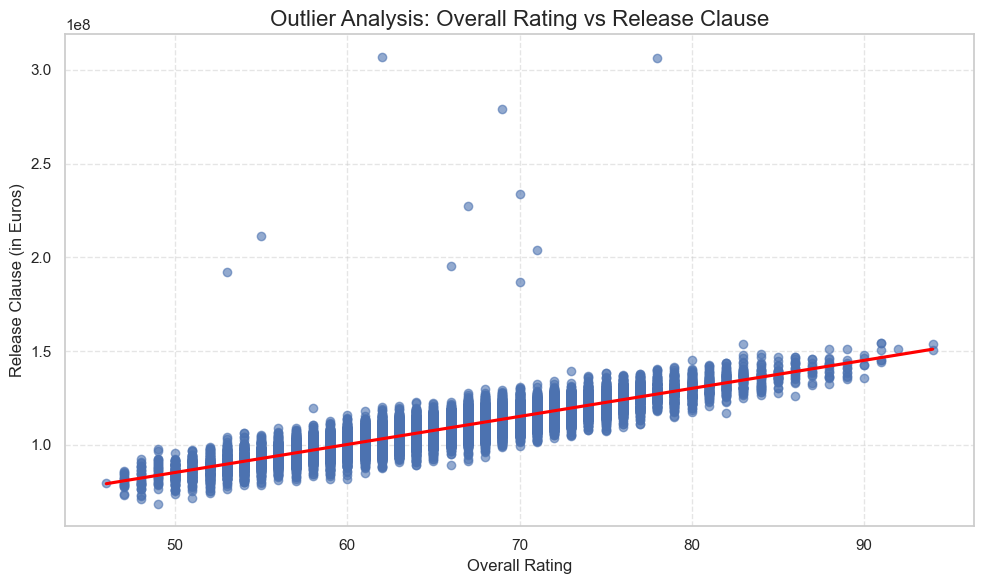

In [12]:
# Task (11) By 2023EBCS005 Ashfaaq Feroz Muhammad

# Drop rows with missing values in the relevant columns
release_data = df_cleaned[['Overall', 'Release Clause']].dropna()

# Set figure size
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(data=release_data, x='Overall', y='Release Clause', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# Title and labels
plt.title('Outlier Analysis: Overall Rating vs Release Clause', fontsize=16)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Release Clause (in Euros)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

- The regression line indicates a positive correlation: players with elevated Overall Ratings generally possess higher Release Clauses.
- Nevertheless, certain players are significantly above or below the trend line:
- Outliers above: This may be attributed to young players with substantial potential or marketability.
- Outliers below: This could signify undervalued players, poor contract management, or depreciation due to age.
- These irregularities frequently hinge on club strategies, market demand, and negotiation dynamics.

Final Summary: Key Findings from the Analysis

This task required an in-depth examination of player performance alongside demographic data, utilizing Python's Matplotlib and Seaborn libraries. Presented below is a summary of the principal insights derived from the visualizations and statistical analyses conducted over 11 tasks:

⸻

1. Data Cleaning and Preparation
	- The fundamental columns, including Wage, Value, Height, and Weight, were effectively sanitized and transformed into suitable numeric formats.\
	- This process guaranteed dependable input for subsequent analyses and visual representations.

⸻

2. Univariate Analysis
	- The age distribution exhibited a slight right skew, with most players concentrated in the 20 to 30-year range.
	- A notable peak at approximately 25 years suggests that this is the optimal playing age for the majority of footballers.

⸻

3. Top 10 Nationalities
	- A horizontal bar chart illustrated that nations such as England, Germany, Spain, and Brazil are predominant in the dataset regarding the number of players.
	- This observation probably indicates a concentration on European leagues within the dataset.
⸻

4. Bivariate Analysis: Age vs Overall Rating
	- A scatter plot indicated that although younger players (ages 18–25) exhibit a range of overall ratings, there is a noticeable decline in high ratings as age surpasses 30.
	- Additionally, there are few older players who possess elite ratings, which reinforces the notion of a decline in player performance following their peak years.

⸻

5. Preferred Foot vs Overall Rating
	- A box plot illustrated that the performance distributions of both left-footed and right-footed players are comparable.
	- A slightly greater consistency and a higher median were noted among right-footed players, which may be attributed to their increased representation.
⸻

6. Correlation Heatmap
	•	Strong correlations were found between:
	•	Overall and Wage/Value
	•	Potential and Value
	•	Age showed a negative correlation with Potential, highlighting that younger players are viewed as having more potential.

⸻

7. Trend of Overall by Age
	•	A line plot indicated that Overall rating increases from age 18 to mid-20s, peaks around 27–30, and then declines.
	•	This aligns with typical career arcs of professional footballers.

⸻

8. Potential: Younger vs Older Players
	•	Histograms showed that younger players (<25) have significantly higher potential scores compared to older players.
	•	This confirms that scouts and clubs invest more in youth development.

⸻

9. Top 5 Clubs – Average Ratings
	•	Among the clubs with the most players, some showed high Overall averages, while others had stronger Potential averages.
	•	This reflects differing recruitment strategies — some clubs focus on peak performance, others on nurturing future stars.

⸻

10. Skill Ratings by Nationality
	•	Players from Brazil and Argentina showed superior Dribbling and Ball Control, while Germany and England showed strength in Finishing.
	•	These trends reflect culturally ingrained playstyles and national training philosophies.

⸻

11. Outlier Analysis – Overall vs Release Clause
	•	A regression plot identified players with unusually high or low release clauses compared to their Overall rating.
	•	Outliers may result from factors like contract length, age, potential, marketability, or undervalued talent.

⸻

Conclusion

- This analysis offered profound insights into player demographics, performance metrics, and trends at both club and national levels.
- Through the use of visual techniques and careful interpretation, we emphasized significant patterns that resonate with the realities of football — including age-related performance, scouting strategies, and international skill profiles.